To compare local Boston data from the MIMIC dataset with disease incidence rates in Massachusetts or the USA, download the 2021 Global Burden of Disease (GBD) study data. You can access the data at GBD Results Tool. https://vizhub.healthdata.org/gbd-results/

Download Settings:

    GBD Estimate: Cause of death or injury
    Measure: Prevalence, Incidence
    Metric: Number, Percent, Rate
    Cause: All Level 2 causes
    Location: United States of America, Massachusetts
    Age Groups: <5 years, 5-14 years, 15-49 years, 50-69 years, 70+ years, All ages
    Sex: Male, Female, Both
    Year Range: 2008 to 2021

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
ma_df = pd.read_csv("../dataset/IHME-GBD_2021_DATA-4cce5613-1/IHME-GBD_2021_DATA-4cce5613-1.csv")
ma_df.head()

,measure_id,measure_name,location_id,location_name,sex_id,sex_name,age_id,age_name,cause_id,cause_name,metric_id,metric_name,year,val,upper,lower
0,5,Prevalence,102,United States of America,1,Male,1,<5 years,344,Neglected tropical diseases and malaria,1,Number,2008,47341.888447,73127.485215,36132.224131
1,5,Prevalence,102,United States of America,2,Female,1,<5 years,344,Neglected tropical diseases and malaria,1,Number,2008,33449.957835,42313.702018,26903.429256
2,5,Prevalence,102,United States of America,3,Both,1,<5 years,344,Neglected tropical diseases and malaria,1,Number,2008,80791.846282,106412.848972,67620.230533
3,5,Prevalence,102,United States of America,1,Male,1,<5 years,344,Neglected tropical diseases and malaria,2,Percent,2008,0.007713,0.011676,0.005877
4,5,Prevalence,102,United States of America,2,Female,1,<5 years,344,Neglected tropical diseases and malaria,2,Percent,2008,0.005197,0.006559,0.004158


In [18]:
# Display basic information about the DataFrame
ma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66528 entries, 0 to 66527
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     66528 non-null  int64  
 1   measure_name   66528 non-null  object 
 2   location_id    66528 non-null  int64  
 3   location_name  66528 non-null  object 
 4   sex_id         66528 non-null  int64  
 5   sex_name       66528 non-null  object 
 6   age_id         66528 non-null  int64  
 7   age_name       66528 non-null  object 
 8   cause_id       66528 non-null  int64  
 9   cause_name     66528 non-null  object 
 10  metric_id      66528 non-null  int64  
 11  metric_name    66528 non-null  object 
 12  year           66528 non-null  int64  
 13  val            66528 non-null  float64
 14  upper          66528 non-null  float64
 15  lower          66528 non-null  float64
dtypes: float64(3), int64(7), object(6)
memory usage: 8.1+ MB


In [19]:
# Display summary statistics
ma_df.describe()

,measure_id,location_id,sex_id,age_id,cause_id,metric_id,year,val,upper,lower
count,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,66528.000000,6.652800e+04,6.652800e+04,6.652800e+04
mean,5.500000,323.000000,2.000000,20.166667,690.545455,2.000000,2014.500000,2.256407e+06,2.507339e+06,2.028477e+06
std,0.500004,221.001661,0.816503,8.668334,208.795667,0.816503,4.031159,1.982590e+07,2.210636e+07,1.772059e+07
min,5.000000,102.000000,1.000000,1.000000,344.000000,1.000000,2008.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.000000,102.000000,1.000000,22.000000,526.000000,1.000000,2011.000000,6.863432e-02,8.112017e-02,5.914413e-02
50%,5.500000,323.000000,2.000000,23.500000,661.000000,2.000000,2014.500000,1.451626e+03,1.786987e+03,1.182238e+03
75%,6.000000,544.000000,3.000000,25.000000,956.000000,3.000000,2018.000000,4.707323e+04,5.322634e+04,4.060048e+04
max,6.000000,544.000000,3.000000,26.000000,974.000000,3.000000,2021.000000,9.691119e+08,1.063090e+09,8.773875e+08


In [20]:
# Check for missing values
ma_df.isnull().sum()

measure_id       0
measure_name     0
location_id      0
location_name    0
sex_id           0
sex_name         0
age_id           0
age_name         0
cause_id         0
cause_name       0
metric_id        0
metric_name      0
year             0
val              0
upper            0
lower            0
dtype: int64

In [21]:
# Unique value in columns
for column in ma_df.columns:
    if column not in ["val", "upper", "lower"]:
        print(f"Unique value in {column}: {ma_df[column].unique()}")

Unique value in measure_id: [5 6]
Unique value in measure_name: ['Prevalence' 'Incidence']
Unique value in location_id: [102 544]
Unique value in location_name: ['United States of America' 'Massachusetts']
Unique value in sex_id: [1 2 3]
Unique value in sex_name: ['Male' 'Female' 'Both']
Unique value in age_id: [ 1 22 23 24 25 26]
Unique value in age_name: ['<5 years' 'All ages' '5-14 years' '15-49 years' '50-69 years'
 '70+ years']
Unique value in cause_id: [344 696 717 956 957 962 973 542 410 653 955 558 669 640 386 961 974 491
 508 526 626 688]
Unique value in cause_name: ['Neglected tropical diseases and malaria' 'Unintentional injuries'
 'Self-harm and interpersonal violence'
 'Respiratory infections and tuberculosis' 'Enteric infections'
 'Maternal and neonatal disorders' 'Substance use disorders'
 'Neurological disorders' 'Neoplasms' 'Skin and subcutaneous diseases'
 'HIV/AIDS and sexually transmitted infections' 'Mental disorders'
 'Sense organ diseases' 'Other non-communicable

In [22]:
# Drop columns with "_id" in the name
ma_df = ma_df.drop(columns=[col for col in ma_df.columns if "_id" in col])

In [23]:
ma_df = ma_df[(ma_df["measure_name"] == "Incidence")&(ma_df["metric_name"] == "Percent")]
ma_df

,measure_name,location_name,sex_name,age_name,cause_name,metric_name,year,val,upper,lower
33267,Incidence,United States of America,Male,<5 years,Neglected tropical diseases and malaria,Percent,2008,3.003929e-07,0.000001,5.856409e-08
33268,Incidence,United States of America,Female,<5 years,Neglected tropical diseases and malaria,Percent,2008,3.106844e-07,0.000001,4.413128e-08
33269,Incidence,United States of America,Both,<5 years,Neglected tropical diseases and malaria,Percent,2008,3.053778e-07,0.000001,5.310589e-08
33276,Incidence,United States of America,Male,<5 years,Neglected tropical diseases and malaria,Percent,2009,3.593381e-07,0.000002,5.755798e-08
33277,Incidence,United States of America,Female,<5 years,Neglected tropical diseases and malaria,Percent,2009,3.788499e-07,0.000002,4.598388e-08
...,...,...,...,...,...,...,...,...,...,...
66523,Incidence,United States of America,Female,70+ years,Digestive diseases,Percent,2018,3.008026e-02,0.033838,2.595423e-02
66524,Incidence,United States of America,Both,70+ years,Digestive diseases,Percent,2018,2.978094e-02,0.033613,2.585521e-02
66525,Incidence,Massachusetts,Male,70+ years,Digestive diseases,Percent,2018,2.842600e-02,0.032210,2.476164e-02
66526,Incidence,Massachusetts,Female,70+ years,Digestive diseases,Percent,2018,2.888433e-02,0.032426,2.503993e-02


Since the MIMIC data categorizes years into ranges, aggregate the data to match these specific ranges: '2008 - 2010', '2011 - 2013', '2014 - 2016', and '2017 - 2019'.

In [24]:
# Define year ranges and corresponding labels
year_bins = [2007, 2010, 2013, 2016, 2019]  # Define boundaries for bins
year_labels = ['2008 - 2010', '2011 - 2013', '2014 - 2016', '2017 - 2019']

# Categorize years into defined ranges
ma_df['year_range'] = pd.cut(ma_df['year'], bins=year_bins, labels=year_labels, right=True)

# Group by the new year ranges and other relevant columns, then aggregate
aggregated_df = ma_df.groupby(['location_name', 'sex_name', 'age_name', 
                            'cause_name', 'metric_name', 'year_range']).agg({
    'val': 'mean',        # Aggregate the values by summing
    'upper': 'mean',      # Aggregate the upper values
    'lower': 'mean'       # Aggregate the lower values
}).reset_index()

In [27]:
# Group by the specified columns and calculate the total 'val' within each group
group_cols = ['location_name', 'sex_name', 'age_name', 'metric_name', 'year_range']
aggregated_df['total_val'] = aggregated_df.groupby(group_cols)['val'].transform('sum')

# Calculate the percentage contribution of each cause_name within each group
aggregated_df['percentage_of_group'] = (aggregated_df['val'] / aggregated_df['total_val']) * 100

In [28]:
aggregated_df

,location_name,sex_name,age_name,cause_name,metric_name,year_range,val,upper,lower,total_val,percentage_of_group
0,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2008 - 2010,0.000396,0.000453,0.000340,0.976161,0.040546
1,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2011 - 2013,0.000374,0.000424,0.000323,0.975058,0.038307
2,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2014 - 2016,0.000356,0.000401,0.000309,0.974289,0.036577
3,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2017 - 2019,0.000346,0.000392,0.000298,0.973702,0.035579
4,Massachusetts,Both,15-49 years,Chronic respiratory diseases,Percent,2008 - 2010,0.001513,0.001895,0.001143,0.976161,0.155008
...,...,...,...,...,...,...,...,...,...,...,...
3163,United States of America,Male,All ages,Transport injuries,Percent,2017 - 2019,0.003751,0.004305,0.003275,0.959555,0.390888
3164,United States of America,Male,All ages,Unintentional injuries,Percent,2008 - 2010,0.025972,0.028708,0.023495,0.965060,2.691221
3165,United States of America,Male,All ages,Unintentional injuries,Percent,2011 - 2013,0.026726,0.029375,0.024294,0.962624,2.776357
3166,United States of America,Male,All ages,Unintentional injuries,Percent,2014 - 2016,0.027312,0.030066,0.024860,0.960584,2.843283


In [54]:
# 1. Comparison of incidence across different causes
def plot_incidence_by_cause(df, sex, age, location, year_range):
    incidence_data = df[(df['sex_name'] == sex) & 
                            (df['age_name'] == age) &
                            (df['location_name'] == location) &
                           (df['year_range'] == year_range)]
    plt.figure(figsize=(12, 6))
    sns.barplot(x='cause_name', y='percentage_of_group', data=incidence_data)
    plt.title(f'percentage_of incidence of Different Causes in {location}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

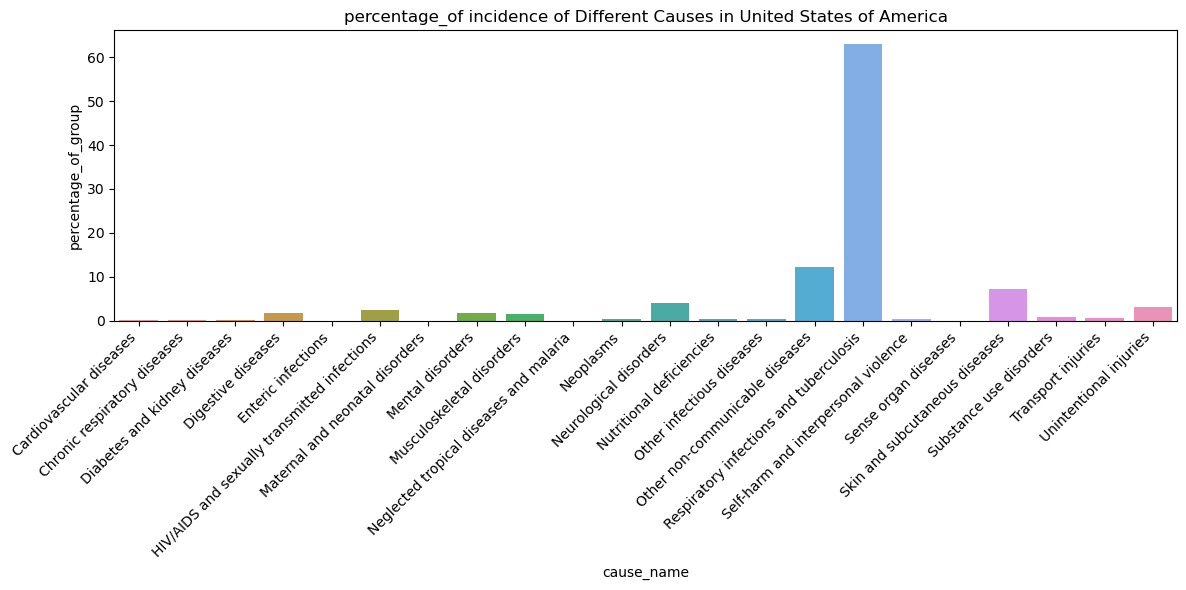

In [56]:
plot_incidence_by_cause(aggregated_df, 'Male', '15-49 years', "United States of America", "2011 - 2013")

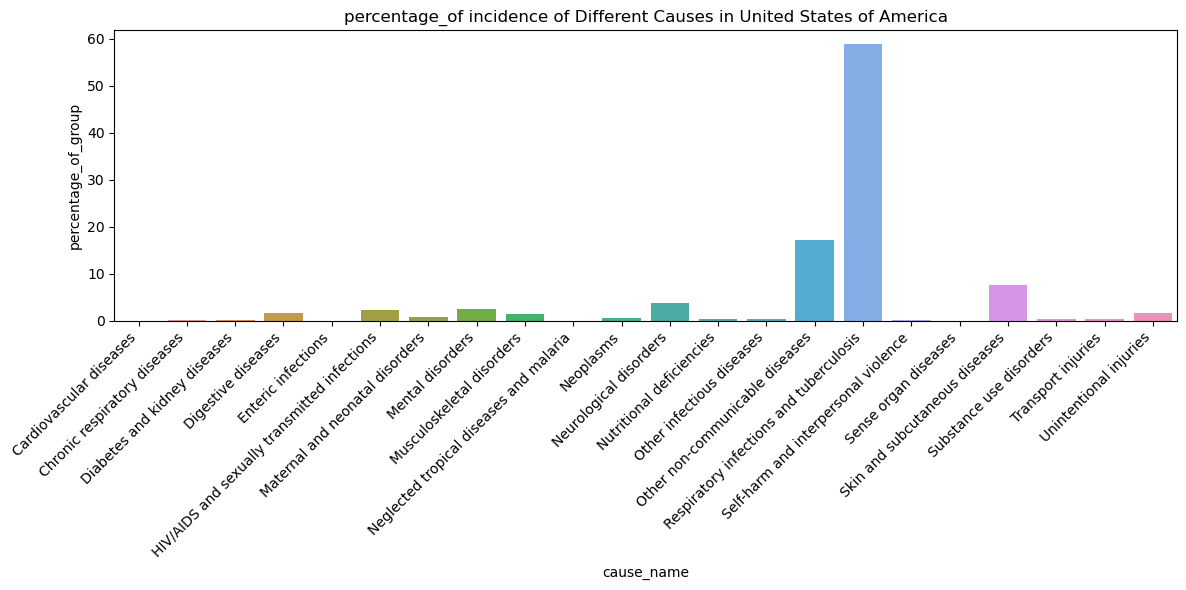

In [59]:
plot_incidence_by_cause(aggregated_df, 'Female', '15-49 years', "United States of America", "2011 - 2013")

In [11]:
# # 3. Gender comparison
# def plot_gender_comparison():
#     gender_data = ma_df[(ma_df['measure_name'] == 'Prevalence') & 
#                         (ma_df['metric_name'] == 'Percent') & 
#                         (ma_df['cause_name'] == 'Mental disorders') & (ma_df['location_name'] == "Massachusetts")]
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x='age_name', y='val', hue='sex_name', data=gender_data)
#     plt.title('Prevalence of Mental Disorders by Age and Gender')
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()

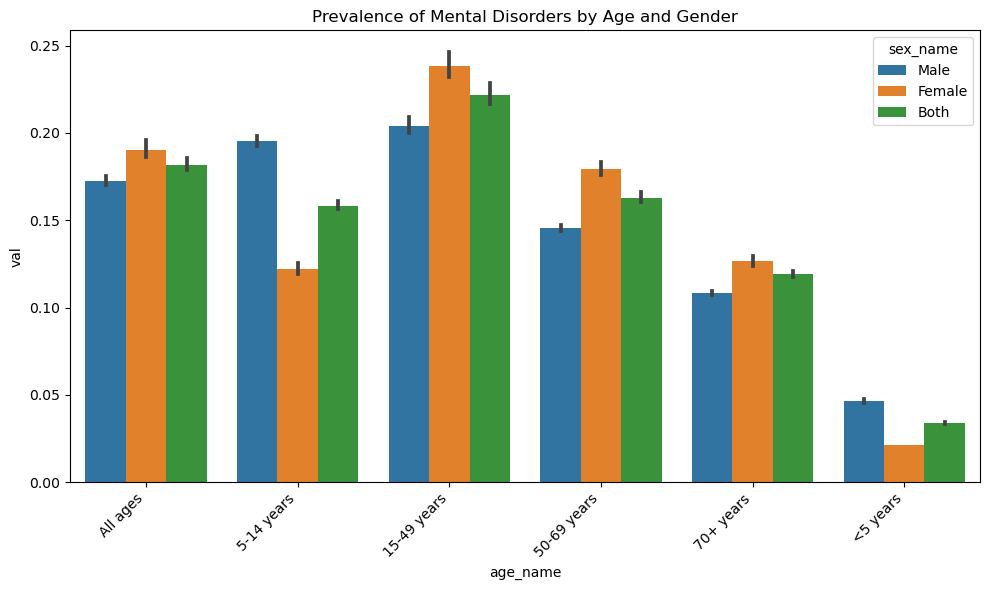

In [12]:
# plot_gender_comparison()

In [13]:
# # 4. Correlation analysis
# def correlation_analysis():
#     pivot_df = ma_df.pivot_table(values='val', 
#                                  index=['year', 'sex_name', 'age_name'], 
#                                  columns='cause_name')
#     correlation_matrix = pivot_df.corr()
#     plt.figure(figsize=(12, 10))
#     sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
#     plt.title('Correlation Between Different Causes')
#     plt.tight_layout()
#     plt.show()

In [15]:
# # 5. Age group analysis
# def plot_age_group_analysis():
#     age_data = ma_df[(ma_df['measure_name'] == 'Prevalence') & 
#                      (ma_df['metric_name'] == 'Percent') & 
#                      (ma_df['sex_name'] == 'Both')]
#     plt.figure(figsize=(12, 6))
#     sns.boxplot(x='age_name', y='val', data=age_data)
#     plt.title('Distribution of Prevalence Across Age Groups')
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()
#     plt.show()

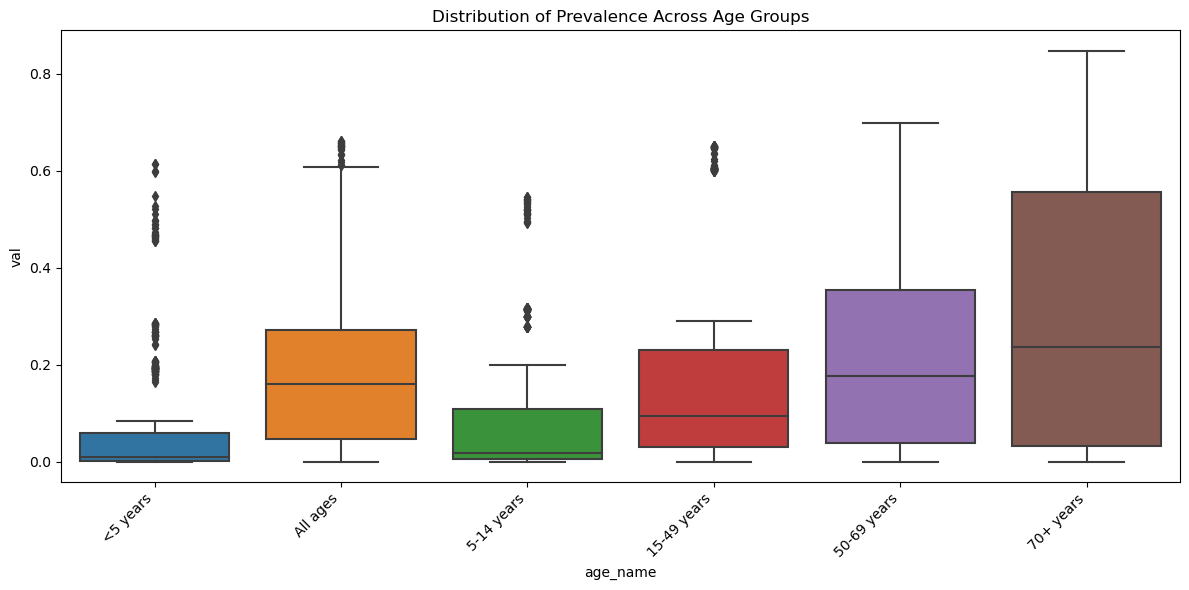

In [16]:
# plot_age_group_analysis()

Aggregating MIMIC Data

We need the following information for each patient: time, ICD code, sex, age, year, and the key column. Since we are calculating incidence rates, we may also need data on the population covered by the MIMIC-IV hospital. Alternatively, instead of calculating absolute incidence rates, we could compare the relative rates of different diseases. Calculating the percentage distribution of each disease might also be a useful approach.

In [73]:
patients_df = pd.read_csv("../../physionet.org/files/mimiciv/3.0/hosp/patients.csv.gz")
patients_df.head(5)

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000058,F,33,2168,2020 - 2022,NaN
3,10000068,F,19,2160,2008 - 2010,NaN
4,10000084,M,72,2160,2017 - 2019,2161-02-13


In [74]:
edstays_df = pd.read_csv("../../physionet.org/files/mimic-iv-ed/2.2/ed/edstays.csv.gz")
edstays_df.head(5)

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED


In [75]:
# merge patients_df, edstays_df by subject_id
merged_df = pd.merge(patients_df, edstays_df, on='subject_id', how='inner')
merged_df.head(5)

,subject_id,gender_x,anchor_age,anchor_year,anchor_year_group,dod,hadm_id,stay_id,intime,outtime,gender_y,race,arrival_transport,disposition
0,10000032,F,52,2180,2014 - 2016,2180-09-09,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED
1,10000032,F,52,2180,2014 - 2016,2180-09-09,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED
2,10000032,F,52,2180,2014 - 2016,2180-09-09,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED
3,10000032,F,52,2180,2014 - 2016,2180-09-09,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME
4,10000032,F,52,2180,2014 - 2016,2180-09-09,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED


In [76]:
# groupby diagnosis_df with stay_id, merge with patients_df, edstays_df by stay_id
diagnosis_df = pd.read_csv("../../physionet.org/files/mimic-iv-ed/2.2/ed/diagnosis.csv.gz")
diagnosis_grouped_df = diagnosis_df.groupby('stay_id').agg(list).reset_index()
diagnosis_grouped_df.head(5)
merged_df = pd.merge(merged_df, diagnosis_grouped_df, on='stay_id', how='inner')
merged_df.head(5)

,subject_id_x,gender_x,anchor_age,anchor_year,anchor_year_group,dod,hadm_id,stay_id,intime,outtime,gender_y,race,arrival_transport,disposition,subject_id_y,seq_num,icd_code,icd_version,icd_title
0,10000032,F,52,2180,2014 - 2016,2180-09-09,22595853.0,33258284,2180-05-06 19:17:00,2180-05-06 23:30:00,F,WHITE,AMBULANCE,ADMITTED,"[10000032, 10000032, 10000032, 10000032]","[1, 2, 3, 4]","[5728, 78959, 07070, V08]","[9, 9, 9, 9]","[OTH SEQUELA, CHR LIV DIS, OTHER ASCITES, UNSP..."
1,10000032,F,52,2180,2014 - 2016,2180-09-09,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,"[10000032, 10000032, 10000032, 10000032]","[1, 2, 3, 4]","[78959, 07070, 5715, V08]","[9, 9, 9, 9]","[OTHER ASCITES, UNSPECIFIED VIRAL HEPATITIS C ..."
2,10000032,F,52,2180,2014 - 2016,2180-09-09,25742920.0,35968195,2180-08-05 20:58:00,2180-08-06 01:44:00,F,WHITE,AMBULANCE,ADMITTED,"[10000032, 10000032, 10000032]","[1, 2, 3]","[5715, 78900, V08]","[9, 9, 9]","[CIRRHOSIS OF LIVER NOS, ABDOMINAL PAIN UNSPEC..."
3,10000032,F,52,2180,2014 - 2016,2180-09-09,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,"[10000032, 10000032, 10000032]","[1, 2, 3]","[4589, 07070, V08]","[9, 9, 9]","[HYPOTENSION NOS, UNSPECIFIED VIRAL HEPATITIS ..."
4,10000032,F,52,2180,2014 - 2016,2180-09-09,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,"[10000032, 10000032]","[1, 2]","[78097, 34830]","[9, 9]","[ALTERED MENTAL STATUS , ENCEPHALOPATHY, UNSPE..."


In [77]:
merge_df = merged_df[['subject_id_x', 'gender_x', 'anchor_age',
       'anchor_year_group', 'stay_id',  
       'seq_num', 'icd_code', 'icd_version', 'icd_title']]

merge_df.columns = ['subject_id', 'gender', 'age',
       'year_group', 'stay_id',  
       'seq_num', 'icd_code', 'icd_version', 'icd_title']

In [78]:
# merged_df.to_csv("../dataset/milestone_merge.csv")

In [79]:
# merge_df = pd.read_csv("../dataset/milestone_merge.csv")

In [80]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423913 entries, 0 to 423912
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   subject_id   423913 non-null  int64 
 1   gender       423913 non-null  object
 2   age          423913 non-null  int64 
 3   year_group   423913 non-null  object
 4   stay_id      423913 non-null  int64 
 5   seq_num      423913 non-null  object
 6   icd_code     423913 non-null  object
 7   icd_version  423913 non-null  object
 8   icd_title    423913 non-null  object
dtypes: int64(3), object(6)
memory usage: 32.3+ MB


<AxesSubplot:title={'center':'age'}, ylabel='Frequency'>

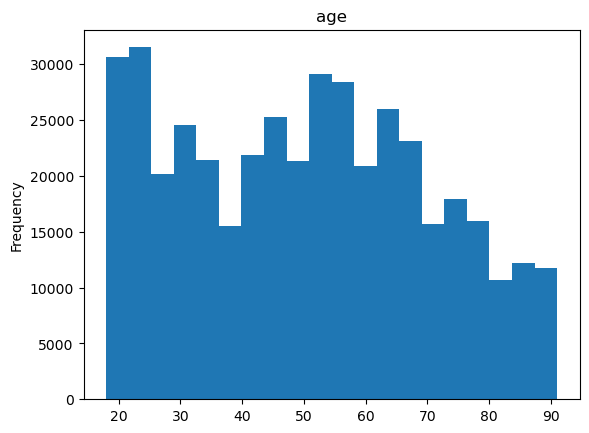

In [82]:
merge_df["age"].plot(kind='hist', bins=20, title="age")

The age distribution appears unusual, with the minimum age being 18.

<Axes: ylabel='year_group'>

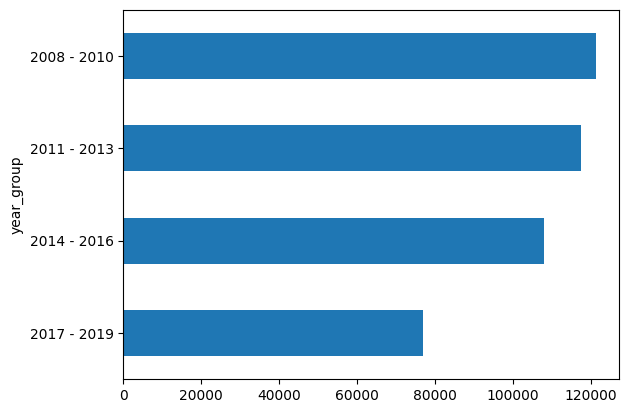

In [12]:
merge_df["year_group"].value_counts(ascending=True).plot(kind='barh')

<Axes: ylabel='gender'>

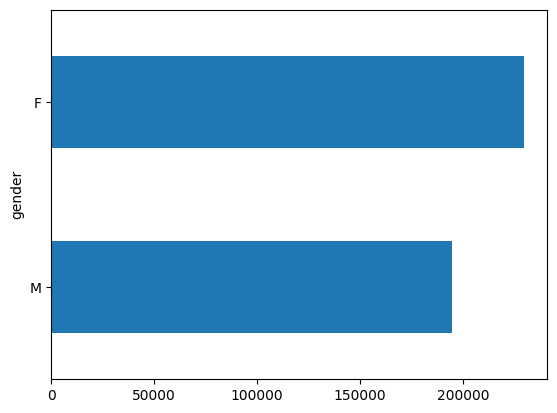

In [13]:
merge_df["gender"].value_counts(ascending=True).plot(kind='barh')

In [83]:
# add a new column to your DataFrame and categorize the ages into the specified groups:
# '<5 years', 'All ages', '5-14 years', '15-49 years', '50-69 years', '70+ years'

def categorize_age(age):
    if pd.isna(age):
        return 'All ages'
    elif age < 5:
        return '<5 years'
    elif 5 <= age <= 14:
        return '5-14 years'
    elif 15 <= age <= 49:
        return '15-49 years'
    elif 50 <= age <= 69:
        return '50-69 years'
    else:
        return '70+ years'

merge_df['age_category'] = merge_df['age'].apply(categorize_age)
merge_df

/var/folders/jl/gnkp_hvs3zqb957750yclnqr0000gn/T/ipykernel_68955/3558476321.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['age_category'] = merge_df['age'].apply(categorize_age)


,subject_id,gender,age,year_group,stay_id,seq_num,icd_code,icd_version,icd_title,age_category
0,10000032,F,52,2014 - 2016,33258284,"[1, 2, 3, 4]","[5728, 78959, 07070, V08]","[9, 9, 9, 9]","[OTH SEQUELA, CHR LIV DIS, OTHER ASCITES, UNSP...",50-69 years
1,10000032,F,52,2014 - 2016,38112554,"[1, 2, 3, 4]","[78959, 07070, 5715, V08]","[9, 9, 9, 9]","[OTHER ASCITES, UNSPECIFIED VIRAL HEPATITIS C ...",50-69 years
2,10000032,F,52,2014 - 2016,35968195,"[1, 2, 3]","[5715, 78900, V08]","[9, 9, 9]","[CIRRHOSIS OF LIVER NOS, ABDOMINAL PAIN UNSPEC...",50-69 years
3,10000032,F,52,2014 - 2016,32952584,"[1, 2, 3]","[4589, 07070, V08]","[9, 9, 9]","[HYPOTENSION NOS, UNSPECIFIED VIRAL HEPATITIS ...",50-69 years
4,10000032,F,52,2014 - 2016,39399961,"[1, 2]","[78097, 34830]","[9, 9]","[ALTERED MENTAL STATUS , ENCEPHALOPATHY, UNSPE...",50-69 years
...,...,...,...,...,...,...,...,...,...,...
423908,19999784,M,57,2017 - 2019,35692999,[1],[R531],[10],[Weakness],50-69 years
423909,19999828,F,46,2017 - 2019,32917002,"[1, 2]","[E1110, Z7984]","[10, 10]",[Type 2 diabetes mellitus with ketoacidosis wi...,15-49 years
423910,19999828,F,46,2017 - 2019,30712109,[1],[K632],[10],[Fistula of intestine],15-49 years
423911,19999914,F,49,2017 - 2019,32002659,[1],[R4182],[10],"[Altered mental status, unspecified]",15-49 years


In [84]:
import ast

def get_first_element(x):
    if isinstance(x, list) and len(x) > 0:
        return x[0]
    elif isinstance(x, str):
        # If it's a string representation of a list, convert it to a list first
        try:
            lst = eval(x)
            if isinstance(lst, list) and len(lst) > 0:
                return lst[0]
        except:
            pass
    return None


# Create a new column 'primary_ICD' with the first element of each list
merge_df['primary_ICD'] = merge_df['icd_code'].apply(get_first_element)
merge_df['primary_ICD_version'] = merge_df['icd_version'].apply(get_first_element)
merge_df['primary_ICD_title'] = merge_df['icd_title'].apply(get_first_element)
merge_df

/var/folders/jl/gnkp_hvs3zqb957750yclnqr0000gn/T/ipykernel_68955/969446978.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['primary_ICD'] = merge_df['icd_code'].apply(get_first_element)
/var/folders/jl/gnkp_hvs3zqb957750yclnqr0000gn/T/ipykernel_68955/969446978.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['primary_ICD_version'] = merge_df['icd_version'].apply(get_first_element)
/var/folders/jl/gnkp_hvs3zqb957750yclnqr0000gn/T/ipykernel_68955/969446978.py:20: SettingWithCopyWarn

,subject_id,gender,age,year_group,stay_id,seq_num,icd_code,icd_version,icd_title,age_category,primary_ICD,primary_ICD_version,primary_ICD_title
0,10000032,F,52,2014 - 2016,33258284,"[1, 2, 3, 4]","[5728, 78959, 07070, V08]","[9, 9, 9, 9]","[OTH SEQUELA, CHR LIV DIS, OTHER ASCITES, UNSP...",50-69 years,5728,9,"OTH SEQUELA, CHR LIV DIS"
1,10000032,F,52,2014 - 2016,38112554,"[1, 2, 3, 4]","[78959, 07070, 5715, V08]","[9, 9, 9, 9]","[OTHER ASCITES, UNSPECIFIED VIRAL HEPATITIS C ...",50-69 years,78959,9,OTHER ASCITES
2,10000032,F,52,2014 - 2016,35968195,"[1, 2, 3]","[5715, 78900, V08]","[9, 9, 9]","[CIRRHOSIS OF LIVER NOS, ABDOMINAL PAIN UNSPEC...",50-69 years,5715,9,CIRRHOSIS OF LIVER NOS
3,10000032,F,52,2014 - 2016,32952584,"[1, 2, 3]","[4589, 07070, V08]","[9, 9, 9]","[HYPOTENSION NOS, UNSPECIFIED VIRAL HEPATITIS ...",50-69 years,4589,9,HYPOTENSION NOS
4,10000032,F,52,2014 - 2016,39399961,"[1, 2]","[78097, 34830]","[9, 9]","[ALTERED MENTAL STATUS , ENCEPHALOPATHY, UNSPE...",50-69 years,78097,9,ALTERED MENTAL STATUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423908,19999784,M,57,2017 - 2019,35692999,[1],[R531],[10],[Weakness],50-69 years,R531,10,Weakness
423909,19999828,F,46,2017 - 2019,32917002,"[1, 2]","[E1110, Z7984]","[10, 10]",[Type 2 diabetes mellitus with ketoacidosis wi...,15-49 years,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...
423910,19999828,F,46,2017 - 2019,30712109,[1],[K632],[10],[Fistula of intestine],15-49 years,K632,10,Fistula of intestine
423911,19999914,F,49,2017 - 2019,32002659,[1],[R4182],[10],"[Altered mental status, unspecified]",15-49 years,R4182,10,"Altered mental status, unspecified"


To map ICD categories to Level 2 causes of the Global Burden of Disease study, download the mapping dataset from the following link (login required):
https://ghdx.healthdata.org/record/ihme-data/gbd-2021-cause-icd-code-mappings
Both fatal and nonfatal mapping files were downloaded and saved in the data folder.

In [85]:
!pip install openpyxl

In [87]:
fatal_map_df = pd.read_excel("../dataset/IHME_GBD_2021_COD_CAUSE_ICD_CODE_MAP_Y2024M05D16.XLSX",header=1)
non_fatal_map_df = pd.read_excel("../dataset/IHME_GBD_2021_NONFATAL_CAUSE_ICD_CODE_MAP_Y2024M05D16.XLSX",header=1)

In [41]:
non_fatal_map_df[non_fatal_map_df["Cause Hierarchy Level"]==2]

,Cause ID,Cause Hierarchy Level,Cause Name,ICD10,ICD10 Used in Hospital/Claims Analyses,ICD9,ICD9 Used in Hospital/Claims Analyses
0,955,2.0,HIV/AIDS and sexually transmitted infections,"A50-A60.9, A63-A64.0, B20-B23.8, B24-B24.0, B6...","A50-A60.9, I98.0, K67.0-K67.1, N74.3-N74.4","042-044.9, 054.1, 054.11-054.19, 090-099.9, 13...","054.1-054.19, 090-099.5, 131-131.9"
13,956,2.0,Respiratory infections and tuberculosis,"A10-A14, A15 -A18.89, A19-A19.9, A48.1, A70...","A10-A19.9, A48.1, A70, B90-B90.9, B96.0-B97.6,...","010-019.9, 079.82, 137-137.9, 320.4, 381-383.9...","010-019.9, 079.82, 137-137.9, 320.4, 381.0-382..."
23,957,2.0,Enteric infections,"A00-A08.8, A09, A80-A80.9, B91, K52.1","A00-A09, A80-A80.9, K52.1","001-009.9, 045-045.93, 138, V01.0, V01.83, V02...","001-009.9, 045-045.93"
30,344,2.0,Neglected tropical diseases and malaria,"A30-A30.9, A68-A68.9, A69.2-A69.29, A69.8-A69....","A30-A30.9, A71-A74.0, B55.0-B74.2, B92-B94.0","030-030.9, 060-061.8, 065-066.9, 071-071.9, 07...","030-030.9, 076-076.9, 085.0-085.5, 122-125.2, ..."
56,961,2.0,Other infectious diseases,"A08.9, A09.0-A09.9, A14.9, A18.9, A20-A29, A31...","A33-A39.9, A83-B05.9, B94.1, F07.1, G00-G05.8","020-029, 031-034.9, 036-039.4, 039.8-040, 040....","032-033.9, 036-037.9, 047-053.9, 054.72-064.9,..."
70,962,2.0,Maternal and neonatal disorders,"B95.1, F53-F54, N82-N82.9, N96, O00-O98.63, O9...","F53-F54, N82-N82.9, N96-N96, O00-P21.9, P24-P3...","041.02, 619-619.9, 630-679.14, 760-768, 768.2-...","041.02, 619-619.9, 630-679.14, 764-768.9, 771,..."
85,386,2.0,Nutritional deficiencies,"D50-D53.9, E00-E02, E40-E46.9, E50-E61.9, E63-...","E01-E02, E50.0-E50.7","244.2, 260-269.9, 280-281.2, V12.1, V18.2-V18....","244.2, 264.0-264.6"
91,410,2.0,Neoplasms,"C00-C45.9, C46.6, C47-C79.9, C8-D24.9, D26.0-D...","C44.01-D24.9, D26.0-D49.9, E34.0, K62.0-K62.1,...","140-175.9, 177-217.8, 219-237.6, 237.70-237.72...","173.01-217.8, 219-237.6, 237.70-237.72, 237.9-..."
147,491,2.0,Cardiovascular diseases,"B33.2-B33.24, D86.85, G45-G46.8, I00.0-I01.9, ...","A32.82, B33.2-B33.24, B37.6, I01-I09.9, I20-I2...","074.2, 074.21-074.23, 391-391.9, 392.0, 393-39...","074.2-074.23, 112.81-115.94, 391-398.99, 410-4..."
168,508,2.0,Chronic respiratory diseases,"D86-D86.2, D86.9, G47.3-G47.39, J07-J08, J18.7...","D86-D86.2, D86.9, J41-J65.0, J84-J84.9, J92.0-...","135-135.9, 278.03, 327.2-327.29, 470, 470.9-47...","135-135.9, 491-505.9, 515-516.9"


In [88]:
fatal_map_df

,Cause,ICD10,ICD9
0,"Communicable, maternal, neonatal, and nutritio...","A00-A00.9, A01.0-A14, A15-A28.9, A32-A39.9, A4...","001-001.9, 002.0-029, 032-034.9, 036-037.9, 04..."
1,HIV/AIDS and sexually transmitted infections,"A50-A58, A60-A60.9, A63-A63.8, B20-B24.9, B63,...","042-044.9, 054.1, 090-099.9"
2,HIV/AIDS,"B20-B24.9, F02.4",042-044.9
3,HIV/AIDS - Drug-susceptible Tuberculosis,B20.0,NaN
4,HIV/AIDS - Multidrug-resistant Tuberculosis wi...,NaN,NaN
...,...,...,...
299,Physical violence by sharp object,X99-X99.9,E966
300,Physical violence by other means,"X85-X92.9, X96-X98.9, Y00-Y04.9, Y06-Y08.9, Y87.1","E961-E964, E967-E969"
301,Conflict and terrorism,"U00-U03, Y36-Y38.9, Y89.1","E979, E990-E999"
302,Police conflict and executions,"Y35-Y35.9, Y89.0",E970-E978


In [43]:
causes_list = list(non_fatal_map_df[non_fatal_map_df["Cause Hierarchy Level"]==2]["Cause Name"])
causes_list

['HIV/AIDS and sexually transmitted infections',
 'Respiratory infections and tuberculosis',
 'Enteric infections',
 'Neglected tropical diseases and malaria',
 'Other infectious diseases',
 'Maternal and neonatal disorders',
 'Nutritional deficiencies',
 'Neoplasms',
 'Cardiovascular diseases',
 'Chronic respiratory diseases',
 'Digestive diseases',
 'Neurological disorders',
 'Mental disorders',
 'Substance use disorders',
 'Diabetes and kidney diseases',
 'Skin and subcutaneous diseases',
 'Sense organ diseases',
 'Musculoskeletal disorders',
 'Other non-communicable diseases',
 'Transport injuries',
 'Unintentional injuries',
 'Self-harm and interpersonal violence']

It appears that the fatal causes overlap with the nonfatal causes, so only the nonfatal causes were used.

In [90]:
nonfatal_level2_map_df = non_fatal_map_df[non_fatal_map_df["Cause Hierarchy Level"]==2]

In [91]:
# mapping icd code to cause id
import re

def parse_icd_range(range_str):
    parts = range_str.split('-')
    if len(parts) == 1:
        return parts[0].strip(), parts[0].strip()
    start, end = parts
    return start.strip(), end.strip()

def is_in_range(code, start, end):
    if start == end:
        return code == start
    if '.' not in code:
        code += '.0'
    if '.' not in start:
        start += '.0'
    if '.' not in end:
        end += '.9'
    return start <= code <= end

def get_disease_for_icd(icd_code, icd_ranges):
    for disease, ranges in icd_ranges.items():
        for range_str in ranges:
            start, end = parse_icd_range(range_str)
            if is_in_range(icd_code, start, end):
                return disease
    return "Unknown"

def extract_icd_ranges(df, cause_name_col, *icd_cols):
    icd_dict = {}
    for idx, row in df.iterrows():
        cause_name = row[cause_name_col]
        icd_ranges = []
        for icd_col in icd_cols:
            if pd.notna(row[icd_col]):
                ranges = row[icd_col].split(", ")
                for r in ranges:
                    icd_ranges.append(r)
        icd_dict[cause_name] = icd_ranges
    return icd_dict
    
icd9_ranges = extract_icd_ranges(nonfatal_level2_map_df,  "Cause Name", "ICD9", "ICD9 Used in Hospital/Claims Analyses")
icd10_ranges = extract_icd_ranges(nonfatal_level2_map_df, "Cause Name", "ICD10", "ICD10 Used in Hospital/Claims Analyses")

In [111]:
def get_n_element(x, n):
    if isinstance(x, list) and len(x) >= n:
        return x[n-1]
    elif isinstance(x, list) and len(x) == n-1:
        return None
    elif isinstance(x, str):
        return None
    return None


# mapping icd code to cause diease id
def code_map_from_icd_list(row):
    icd_list = row["icd_code"]
    for i in range(1, len(icd_list)+1):
        code = get_n_element(icd_list, i)
        if code:
            if len(code)>3:
                code = code[:3] + "." + code[3:]    
            if row['primary_ICD_version'] == 9:
                result = get_disease_for_icd(code, icd9_ranges)
            else:
                result = get_disease_for_icd(code, icd10_ranges)
            
            if result == "Unknown":
                    continue
            else:
                return result            
        else:
            break
    return "Unknown"

In [112]:
merge_df["map_disease_category"] = merge_df.apply(code_map_from_icd_list, axis=1)
merge_df["map_disease_category"].value_counts()

/var/folders/jl/gnkp_hvs3zqb957750yclnqr0000gn/T/ipykernel_68955/4242469244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df["map_disease_category"] = merge_df.apply(code_map_from_icd_list, axis=1)


Digestive diseases                              62711
Unintentional injuries                          50376
Cardiovascular diseases                         44330
Musculoskeletal disorders                       37725
Other non-communicable diseases                 32382
Chronic respiratory diseases                    29705
Unknown                                         26538
Mental disorders                                23506
Neurological disorders                          23178
Skin and subcutaneous diseases                  18742
Respiratory infections and tuberculosis         17039
Substance use disorders                         12258
Diabetes and kidney diseases                     9334
Transport injuries                               7490
Self-harm and interpersonal violence             7210
Maternal and neonatal disorders                  7159
Sense organ diseases                             5832
Other infectious diseases                        5591
Neoplasms                   

In [117]:
merge_df = merge_df[merge_df["map_disease_category"]!= "Unknown"]
merge_df["case"] = 1
merge_df

,subject_id,gender,age,year_group,stay_id,seq_num,icd_code,icd_version,icd_title,age_category,primary_ICD,primary_ICD_version,primary_ICD_title,map_disease_category,case
0,10000032,F,52,2014 - 2016,33258284,"[1, 2, 3, 4]","[5728, 78959, 07070, V08]","[9, 9, 9, 9]","[OTH SEQUELA, CHR LIV DIS, OTHER ASCITES, UNSP...",50-69 years,5728,9,"OTH SEQUELA, CHR LIV DIS",Digestive diseases,1
1,10000032,F,52,2014 - 2016,38112554,"[1, 2, 3, 4]","[78959, 07070, 5715, V08]","[9, 9, 9, 9]","[OTHER ASCITES, UNSPECIFIED VIRAL HEPATITIS C ...",50-69 years,78959,9,OTHER ASCITES,Digestive diseases,1
2,10000032,F,52,2014 - 2016,35968195,"[1, 2, 3]","[5715, 78900, V08]","[9, 9, 9]","[CIRRHOSIS OF LIVER NOS, ABDOMINAL PAIN UNSPEC...",50-69 years,5715,9,CIRRHOSIS OF LIVER NOS,Digestive diseases,1
3,10000032,F,52,2014 - 2016,32952584,"[1, 2, 3]","[4589, 07070, V08]","[9, 9, 9]","[HYPOTENSION NOS, UNSPECIFIED VIRAL HEPATITIS ...",50-69 years,4589,9,HYPOTENSION NOS,Other infectious diseases,1
4,10000032,F,52,2014 - 2016,39399961,"[1, 2]","[78097, 34830]","[9, 9]","[ALTERED MENTAL STATUS , ENCEPHALOPATHY, UNSPE...",50-69 years,78097,9,ALTERED MENTAL STATUS,Mental disorders,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423907,19999784,M,57,2017 - 2019,34149746,"[1, 2, 3, 4]","[G9782, G960, Y838, Y9289]","[10, 10, 10, 10]",[Oth postproc complications and disorders of n...,50-69 years,G9782,10,Oth postproc complications and disorders of ne...,Unintentional injuries,1
423909,19999828,F,46,2017 - 2019,32917002,"[1, 2]","[E1110, Z7984]","[10, 10]",[Type 2 diabetes mellitus with ketoacidosis wi...,15-49 years,E1110,10,Type 2 diabetes mellitus with ketoacidosis wit...,Diabetes and kidney diseases,1
423910,19999828,F,46,2017 - 2019,30712109,[1],[K632],[10],[Fistula of intestine],15-49 years,K632,10,Fistula of intestine,Digestive diseases,1
423911,19999914,F,49,2017 - 2019,32002659,[1],[R4182],[10],"[Altered mental status, unspecified]",15-49 years,R4182,10,"Altered mental status, unspecified",Neurological disorders,1


In [118]:
merge_df.columns

Index(['subject_id', 'gender', 'age', 'year_group', 'stay_id', 'seq_num',
       'icd_code', 'icd_version', 'icd_title', 'age_category', 'primary_ICD',
       'primary_ICD_version', 'primary_ICD_title', 'map_disease_category',
       'case'],
      dtype='object')

In [119]:
group_list = ["gender", 'age_category', "map_disease_category", "year_group"]

In [124]:
# Group by the new year ranges and other relevant columns, then aggregate
aggregated_merge_df = merge_df.groupby(group_list).agg({
    'case': 'sum',        # Aggregate the values by summing
}).reset_index()
aggregated_merge_df

,gender,age_category,map_disease_category,year_group,case
0,F,15-49 years,Cardiovascular diseases,2008 - 2010,2059
1,F,15-49 years,Cardiovascular diseases,2011 - 2013,1336
2,F,15-49 years,Cardiovascular diseases,2014 - 2016,1665
3,F,15-49 years,Cardiovascular diseases,2017 - 2019,1601
4,F,15-49 years,Chronic respiratory diseases,2008 - 2010,2582
...,...,...,...,...,...
516,M,70+ years,Transport injuries,2017 - 2019,65
517,M,70+ years,Unintentional injuries,2008 - 2010,1058
518,M,70+ years,Unintentional injuries,2011 - 2013,1373
519,M,70+ years,Unintentional injuries,2014 - 2016,1238


In [126]:
# Group by the new year ranges and other relevant columns, then aggregate
aggregated_nogender_merge_df = merge_df.groupby(['age_category', "map_disease_category", "year_group"]).agg({
    'case': 'sum',        # Aggregate the values by summing
}).reset_index()
aggregated_nogender_merge_df["gender"] = "Both"
aggregated_nogender_merge_df

,age_category,map_disease_category,year_group,case,gender
0,15-49 years,Cardiovascular diseases,2008 - 2010,3565,Both
1,15-49 years,Cardiovascular diseases,2011 - 2013,2513,Both
2,15-49 years,Cardiovascular diseases,2014 - 2016,3369,Both
3,15-49 years,Cardiovascular diseases,2017 - 2019,3284,Both
4,15-49 years,Chronic respiratory diseases,2008 - 2010,4081,Both
...,...,...,...,...,...
258,70+ years,Transport injuries,2017 - 2019,144,Both
259,70+ years,Unintentional injuries,2008 - 2010,3077,Both
260,70+ years,Unintentional injuries,2011 - 2013,3461,Both
261,70+ years,Unintentional injuries,2014 - 2016,3125,Both


In [128]:
# Group by the new year ranges and other relevant columns, then aggregate
aggregated_noage_merge_df = merge_df.groupby(["gender", "map_disease_category", "year_group"]).agg({
    'case': 'sum',        # Aggregate the values by summing
}).reset_index()
aggregated_noage_merge_df["age_category"] = "All ages"
aggregated_noage_merge_df

,gender,map_disease_category,year_group,case,age_category
0,F,Cardiovascular diseases,2008 - 2010,6676,All ages
1,F,Cardiovascular diseases,2011 - 2013,5092,All ages
2,F,Cardiovascular diseases,2014 - 2016,5740,All ages
3,F,Cardiovascular diseases,2017 - 2019,5153,All ages
4,F,Chronic respiratory diseases,2008 - 2010,6796,All ages
...,...,...,...,...,...
171,M,Transport injuries,2017 - 2019,1023,All ages
172,M,Unintentional injuries,2008 - 2010,4888,All ages
173,M,Unintentional injuries,2011 - 2013,7838,All ages
174,M,Unintentional injuries,2014 - 2016,6998,All ages


In [143]:
combined_df = pd.concat([aggregated_merge_df, aggregated_nogender_merge_df, aggregated_noage_merge_df], axis=0, ignore_index=True)

In [144]:
combined_df

,gender,age_category,map_disease_category,year_group,case
0,F,15-49 years,Cardiovascular diseases,2008 - 2010,2059
1,F,15-49 years,Cardiovascular diseases,2011 - 2013,1336
2,F,15-49 years,Cardiovascular diseases,2014 - 2016,1665
3,F,15-49 years,Cardiovascular diseases,2017 - 2019,1601
4,F,15-49 years,Chronic respiratory diseases,2008 - 2010,2582
...,...,...,...,...,...
955,M,All ages,Transport injuries,2017 - 2019,1023
956,M,All ages,Unintentional injuries,2008 - 2010,4888
957,M,All ages,Unintentional injuries,2011 - 2013,7838
958,M,All ages,Unintentional injuries,2014 - 2016,6998


In [145]:
# Group by the specified columns and calculate the total 'val' within each group
group_cols = ["gender", 'age_category', "year_group"]
combined_df['total_case'] = combined_df.groupby(group_cols)['case'].transform('sum')

# Calculate the percentage contribution of each cause_name within each group
combined_df['percentage_of_group'] = (combined_df['case'] / combined_df['total_case']) * 100
combined_df

,gender,age_category,map_disease_category,year_group,case,total_case,percentage_of_group
0,F,15-49 years,Cardiovascular diseases,2008 - 2010,2059,30245,6.807737
1,F,15-49 years,Cardiovascular diseases,2011 - 2013,1336,30427,4.390837
2,F,15-49 years,Cardiovascular diseases,2014 - 2016,1665,26999,6.166895
3,F,15-49 years,Cardiovascular diseases,2017 - 2019,1601,18115,8.837980
4,F,15-49 years,Chronic respiratory diseases,2008 - 2010,2582,30245,8.536948
...,...,...,...,...,...,...,...
955,M,All ages,Transport injuries,2017 - 2019,1023,33186,3.082625
956,M,All ages,Unintentional injuries,2008 - 2010,4888,49088,9.957627
957,M,All ages,Unintentional injuries,2011 - 2013,7838,53090,14.763609
958,M,All ages,Unintentional injuries,2014 - 2016,6998,47886,14.613875


In [146]:
# make two dataframe consistent
combined_df['gender'] = combined_df['gender'].replace({'F': 'Female', 'M': 'Male'})

In [147]:
combined_df.columns

Index(['gender', 'age_category', 'map_disease_category', 'year_group', 'case',
       'total_case', 'percentage_of_group'],
      dtype='object')

In [148]:
combined_df.columns = ['sex_name', 'age_name', 'cause_name', 'year_range', 'case',
       'total_case', 'percentage_of_group']

combined_df["location_name"] = "Boston"

In [149]:
aggregated_df.head()

,location_name,sex_name,age_name,cause_name,metric_name,year_range,val,upper,lower,total_val,percentage_of_group
0,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2008 - 2010,0.000396,0.000453,0.000340,0.976161,0.040546
1,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2011 - 2013,0.000374,0.000424,0.000323,0.975058,0.038307
2,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2014 - 2016,0.000356,0.000401,0.000309,0.974289,0.036577
3,Massachusetts,Both,15-49 years,Cardiovascular diseases,Percent,2017 - 2019,0.000346,0.000392,0.000298,0.973702,0.035579
4,Massachusetts,Both,15-49 years,Chronic respiratory diseases,Percent,2008 - 2010,0.001513,0.001895,0.001143,0.976161,0.155008


In [151]:
combined_df

,sex_name,age_name,cause_name,year_range,case,total_case,percentage_of_group,location_name
0,Female,15-49 years,Cardiovascular diseases,2008 - 2010,2059,30245,6.807737,Boston
1,Female,15-49 years,Cardiovascular diseases,2011 - 2013,1336,30427,4.390837,Boston
2,Female,15-49 years,Cardiovascular diseases,2014 - 2016,1665,26999,6.166895,Boston
3,Female,15-49 years,Cardiovascular diseases,2017 - 2019,1601,18115,8.837980,Boston
4,Female,15-49 years,Chronic respiratory diseases,2008 - 2010,2582,30245,8.536948,Boston
...,...,...,...,...,...,...,...,...
955,Male,All ages,Transport injuries,2017 - 2019,1023,33186,3.082625,Boston
956,Male,All ages,Unintentional injuries,2008 - 2010,4888,49088,9.957627,Boston
957,Male,All ages,Unintentional injuries,2011 - 2013,7838,53090,14.763609,Boston
958,Male,All ages,Unintentional injuries,2014 - 2016,6998,47886,14.613875,Boston


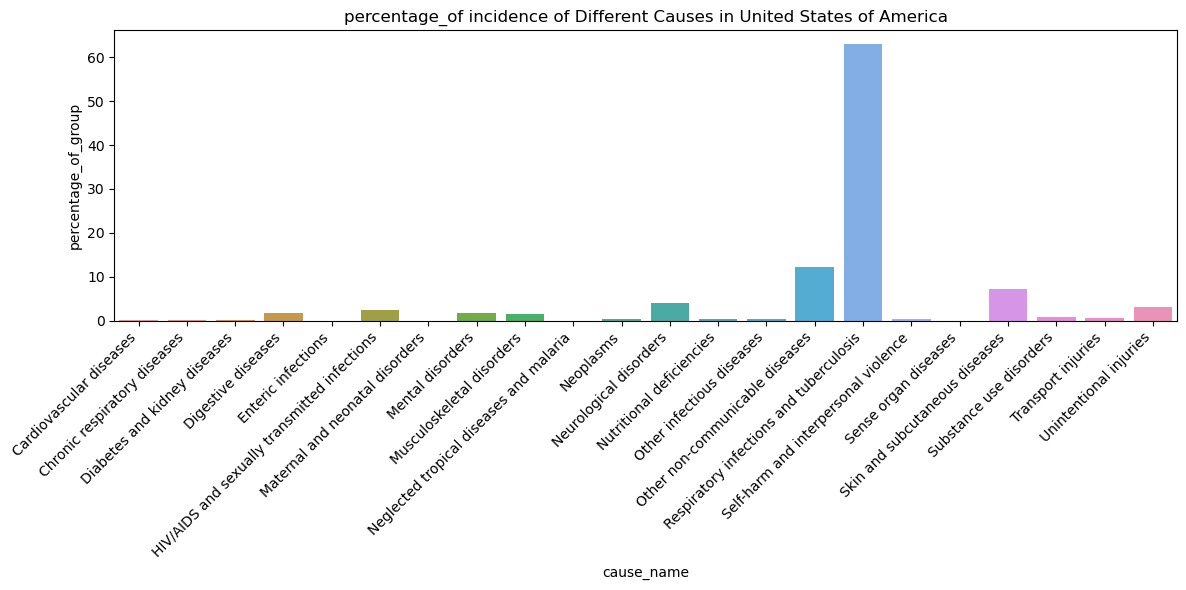

In [141]:
plot_incidence_by_cause(aggregated_df, 'Male', '15-49 years', "United States of America", "2011 - 2013")

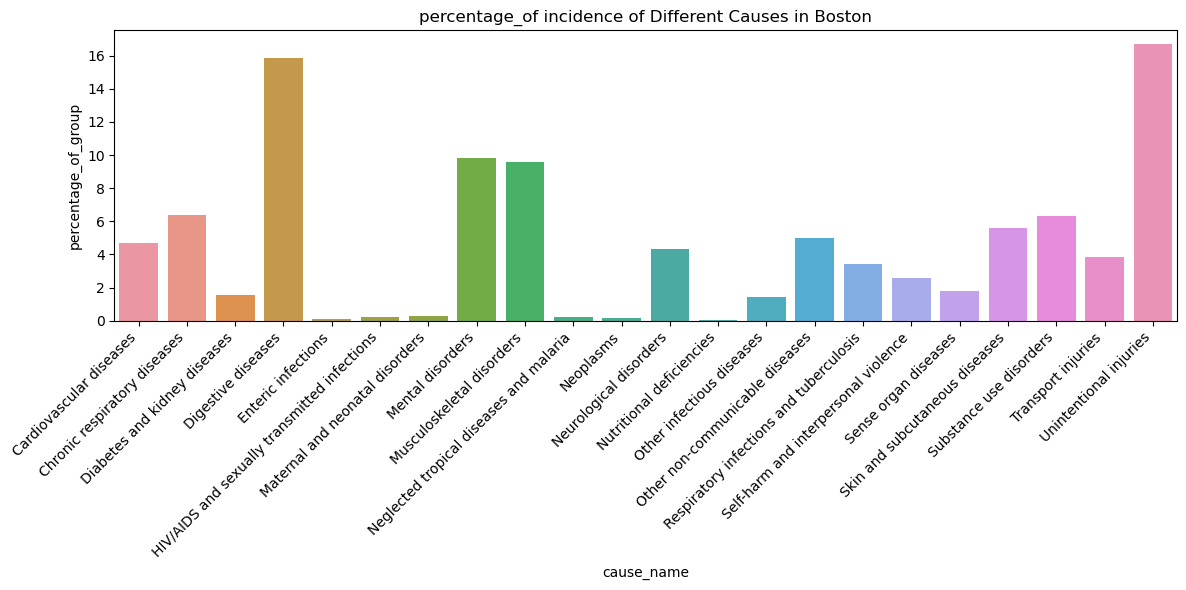

In [152]:
plot_incidence_by_cause(combined_df, 'Male', '15-49 years', "Boston", "2011 - 2013")